**图论基础,学过离散数学的可以直接打怪了,没学过?与我无瓜**

**networkx**
* Graph():创建无向图;
* Graph(A): 由邻接矩阵 A 创建无向图:
* DiGraph(): 创建有向图;
* DiGraph(A):由邻接矩阵 A 创建有向图;
* MultiGraph(): 创建多重无向图;
* MultiDigraph(): 创建多重有向图;
* add edge():添加一条边;
* add edges from (List):从列表中添加多条边;
* add node(): 添加一个顶点;
* add nodes from (List):添加顶点集合;
* dijkstra_path(G, source, target, weight='weight'): 求最短路径;
* dijkstra_path length(G, source, target, weight='weight'):求最短距离.

In [8]:
# 你要是不先导包,就去执行代码那我只能说你是神人了
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
# 设置全局绘图参数
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows系统使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

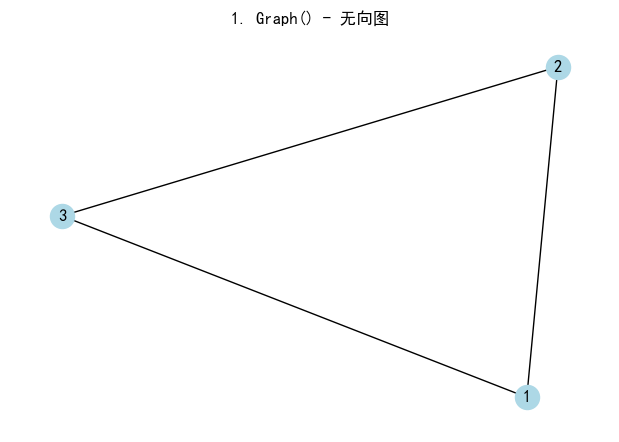

In [9]:
# ======================
# 1. 创建无向图 (Graph())
# ======================
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2, 3), (3, 1)])
nx.draw(G1, with_labels=True, node_color='lightblue')
plt.title("1. Graph() - 无向图")
plt.show()


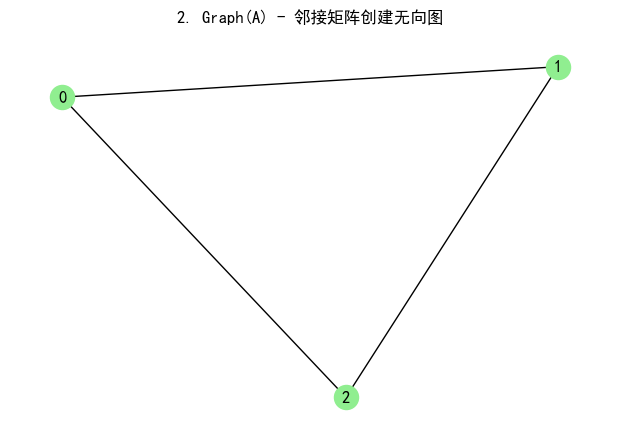

In [11]:
# ======================
# 2. 邻接矩阵创建无向图 (Graph(A))
# ======================
A_undirected = np.array([
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
])
G2 = nx.from_numpy_array(A_undirected)
nx.draw(G2, with_labels=True, node_color='lightgreen')
plt.title("2. Graph(A) - 邻接矩阵创建无向图")
plt.show()


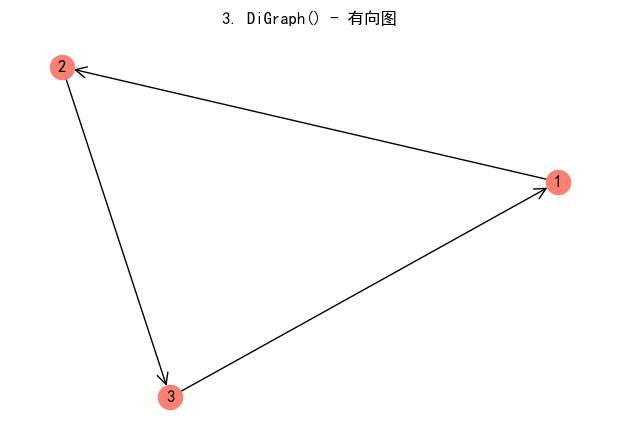

In [17]:
# ======================
# 3. 创建有向图 (DiGraph())
# ======================
DG1 = nx.DiGraph()
DG1.add_edges_from([(1, 2), (2, 3), (3, 1)])
nx.draw(DG1, with_labels=True, node_color='salmon', 
        arrows=True, arrowstyle='->', arrowsize=20)
plt.title("3. DiGraph() - 有向图")
plt.show()

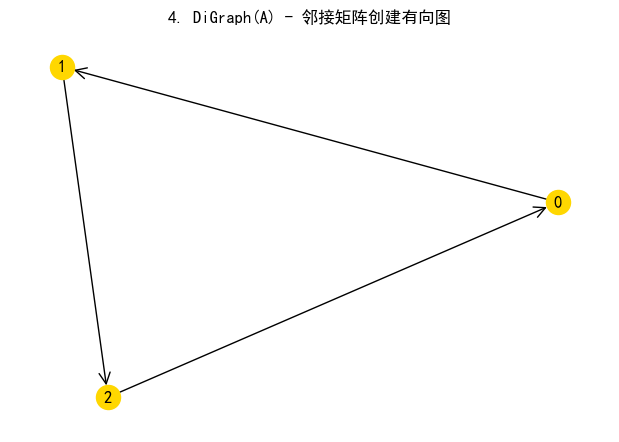

In [21]:
# ======================
# 4. 邻接矩阵创建有向图 (DiGraph(A))
# ======================
A_directed = np.array([
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0]
])
DG2 = nx.from_numpy_array(A_directed, create_using=nx.DiGraph)
nx.draw(DG2, with_labels=True, node_color='gold', 
        arrows=True, arrowstyle='->', arrowsize=20)
plt.title("4. DiGraph(A) - 邻接矩阵创建有向图")
plt.show()

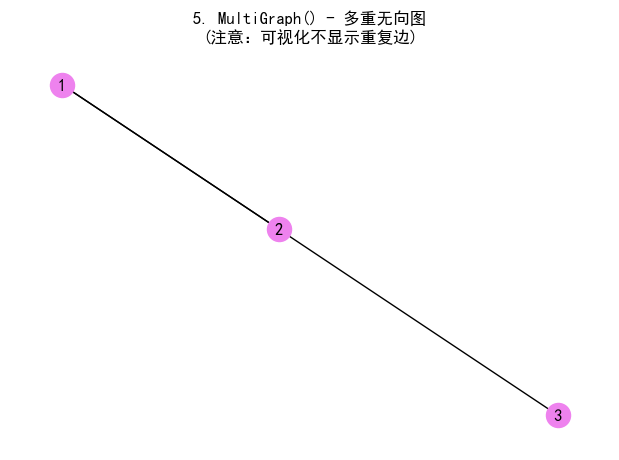

In [24]:
# ======================
# 5. 创建多重无向图 (MultiGraph())
# ======================
MG = nx.MultiGraph()
MG.add_edges_from([(1, 2), (1, 2), (2, 3)])  # 允许重复边
nx.draw(MG, with_labels=True, node_color='violet')
plt.title("5. MultiGraph() - 多重无向图\n(注意：可视化不显示重复边)")
plt.show()

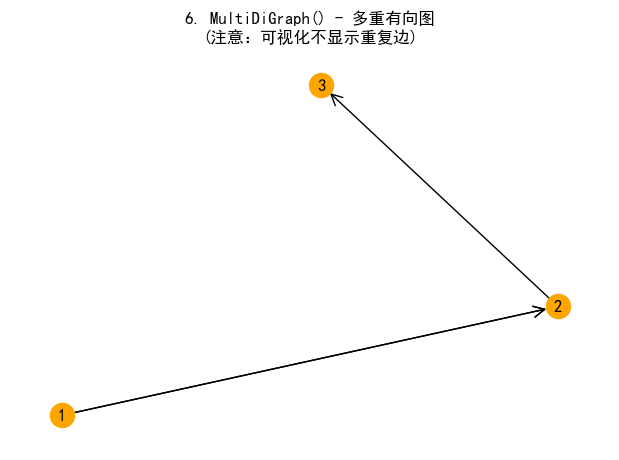

In [25]:
# ======================
# 6. 创建多重有向图 (MultiDiGraph())
# ======================
MDG = nx.MultiDiGraph()
MDG.add_edges_from([(1, 2), (1, 2), (2, 3)])
nx.draw(MDG, with_labels=True, node_color='orange', 
        arrows=True, arrowstyle='->', arrowsize=20)
plt.title("6. MultiDiGraph() - 多重有向图\n(注意：可视化不显示重复边)")
plt.show()

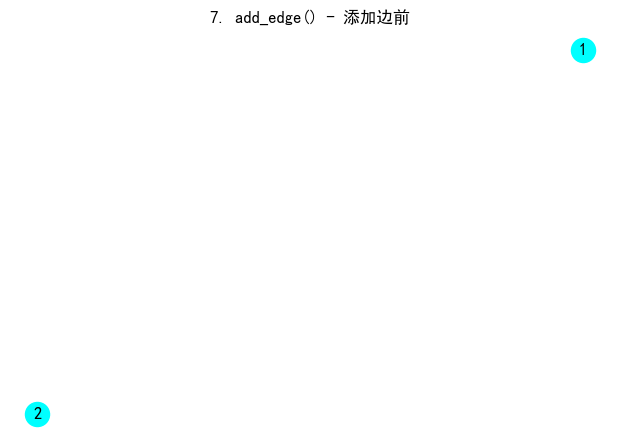

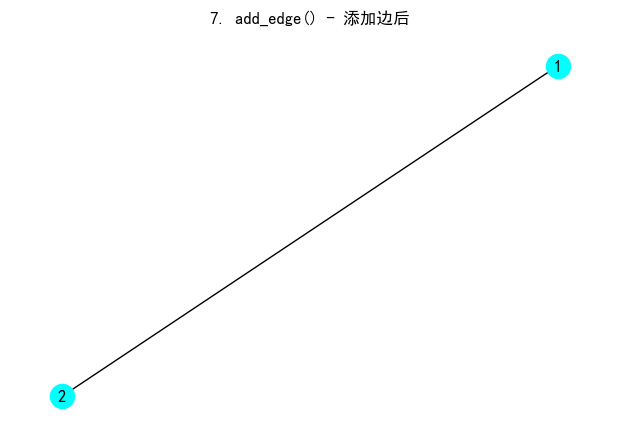

In [28]:
# ======================
# 7. 添加单条边 (add_edge())
# ======================
G_add = nx.Graph()
G_add.add_node(1)
G_add.add_node(2)
nx.draw(G_add, with_labels=True, node_color='cyan')
plt.title("7. add_edge() - 添加边前")
plt.show()
G_add.add_edge(1, 2, weight=0.5)  # 添加带权重的边
nx.draw(G_add, with_labels=True, node_color='cyan')
plt.title("7. add_edge() - 添加边后")
plt.show()


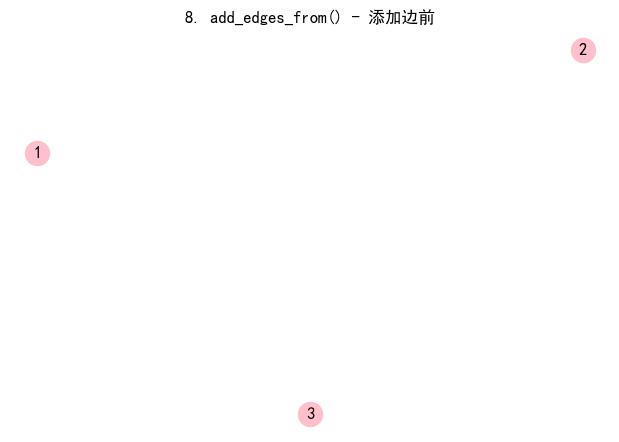

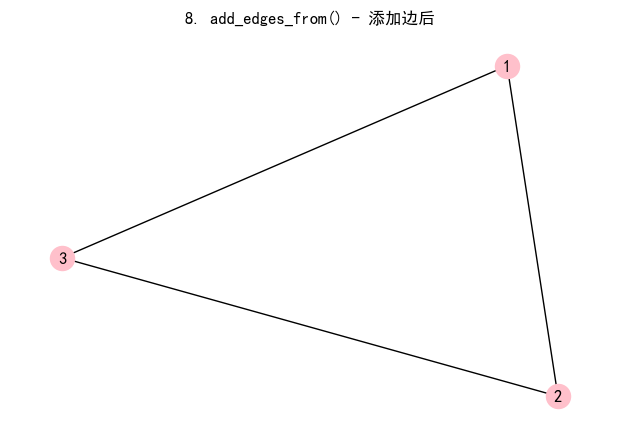

In [30]:
# ======================
# 8. 批量添加边 (add_edges_from())
# ======================
G_bulk = nx.Graph()
G_bulk.add_nodes_from([1, 2, 3])
nx.draw(G_bulk, with_labels=True, node_color='pink')
plt.title("8. add_edges_from() - 添加边前")
plt.show()

G_bulk.add_edges_from([(1, 2), (2, 3), (3, 1)])
nx.draw(G_bulk, with_labels=True, node_color='pink')
plt.title("8. add_edges_from() - 添加边后")
plt.show()

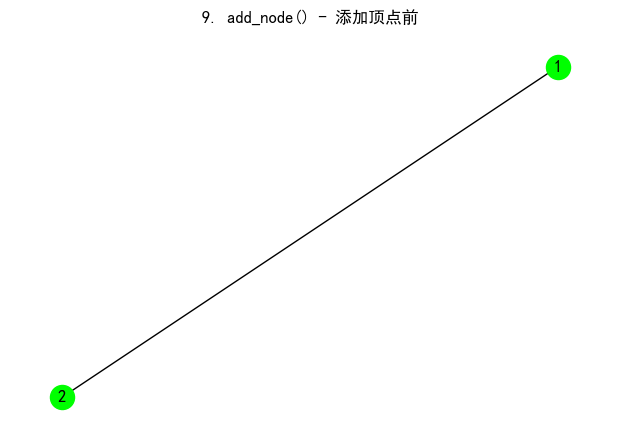

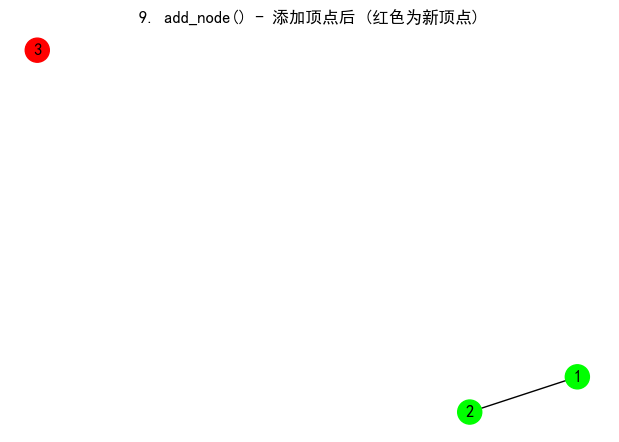

In [31]:
# ======================
# 9. 添加单个顶点 (add_node())
# ======================
G_node = nx.Graph()
G_node.add_edge(1, 2)
nx.draw(G_node, with_labels=True, node_color='lime')
plt.title("9. add_node() - 添加顶点前")
plt.show()

G_node.add_node(3, color='red')  # 添加带属性的顶点
nx.draw(G_node, with_labels=True, node_color=['lime', 'lime', 'red'])
plt.title("9. add_node() - 添加顶点后 (红色为新顶点)")
plt.show()


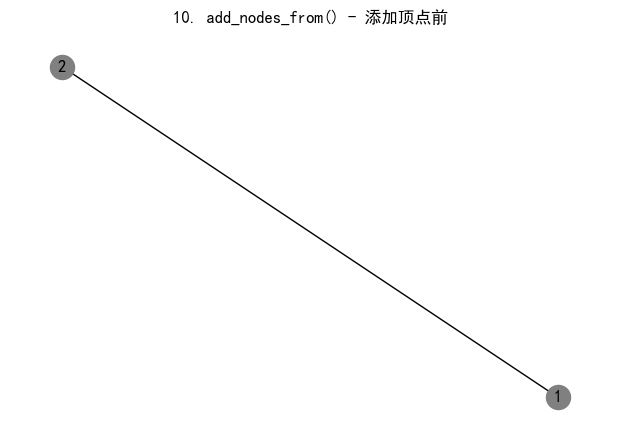

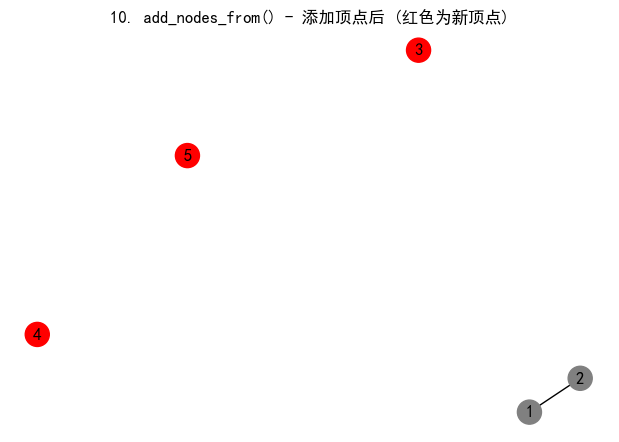

In [32]:
# ======================
# 10. 批量添加顶点 (add_nodes_from())
# ======================
G_nodes = nx.Graph()
G_nodes.add_edge(1, 2)
nx.draw(G_nodes, with_labels=True, node_color='gray')
plt.title("10. add_nodes_from() - 添加顶点前")
plt.show()

G_nodes.add_nodes_from([3, 4, 5])
nx.draw(G_nodes, with_labels=True, 
        node_color=['gray', 'gray', 'red', 'red', 'red'])
plt.title("10. add_nodes_from() - 添加顶点后 (红色为新顶点)")
plt.show()

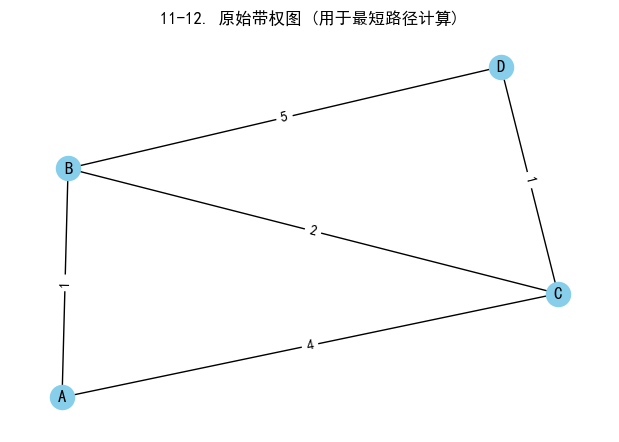

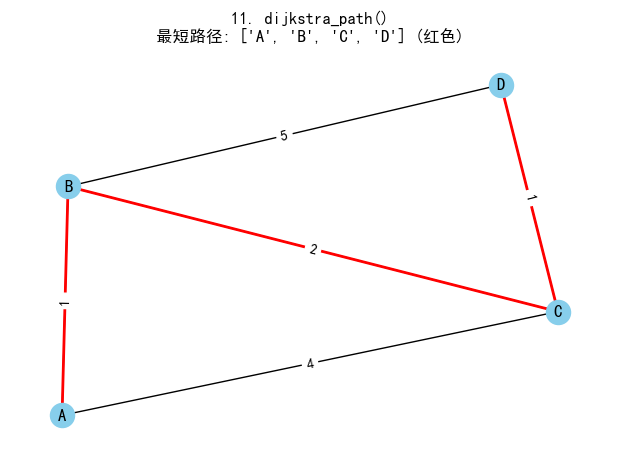

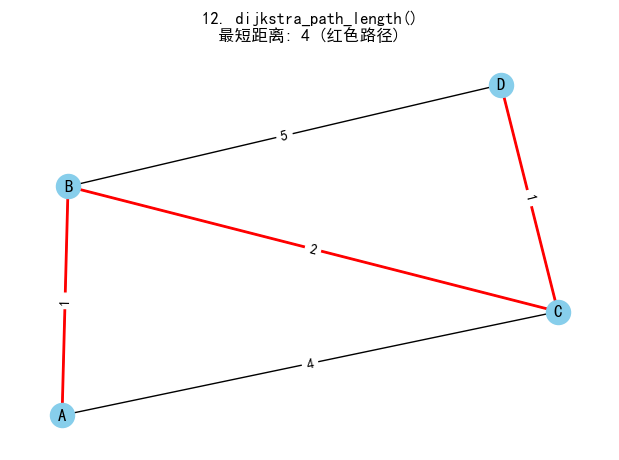

In [34]:
# ======================
# 11-12. 最短路径计算 (需要带权图)
# ======================
weighted_G = nx.Graph()
weighted_G.add_weighted_edges_from([
    ('A', 'B', 1),
    ('A', 'C', 4),
    ('B', 'C', 2),
    ('B', 'D', 5),
    ('C', 'D', 1)
])

# 绘制原始带权图
pos = nx.spring_layout(weighted_G)
nx.draw(weighted_G, pos, with_labels=True, node_color='skyblue')
edge_labels = nx.get_edge_attributes(weighted_G, 'weight')
nx.draw_networkx_edge_labels(weighted_G, pos, edge_labels=edge_labels)
plt.title("11-12. 原始带权图 (用于最短路径计算)")
plt.show()

# (11) dijkstra_path()
path = nx.dijkstra_path(weighted_G, 'A', 'D', weight='weight')
path_edges = list(zip(path[:-1], path[1:]))

# 高亮显示最短路径
nx.draw(weighted_G, pos, with_labels=True, node_color='skyblue')
nx.draw_networkx_edges(weighted_G, pos, edgelist=path_edges, 
                       edge_color='red', width=2)
nx.draw_networkx_edge_labels(weighted_G, pos, edge_labels=edge_labels)
plt.title(f"11. dijkstra_path()\n最短路径: {path} (红色)")
plt.show()

# (12) dijkstra_path_length()
length = nx.dijkstra_path_length(weighted_G, 'A', 'D', weight='weight')
nx.draw(weighted_G, pos, with_labels=True, node_color='skyblue')
nx.draw_networkx_edges(weighted_G, pos, edgelist=path_edges, 
                       edge_color='red', width=2)
nx.draw_networkx_edge_labels(weighted_G, pos, edge_labels=edge_labels)
plt.title(f"12. dijkstra_path_length()\n最短距离: {length} (红色路径)")
plt.show()

#### **匹配问题**
* **人员分派问题:匈牙利算法**
* **最优分派问题:Kuhn-Munkres算法**
![](./img/Snipaste_2025-07-08_19-56-17.png)

In [36]:
import numpy as np
import networkx as nx
from networkx.algorithms.matching import max_weight_matching
a=np.array([[3,5,5,4,1], [2,2,0,2,2], [2,4,4,1,0],
[0,2,2,1,0], [1,2,1,3,3]])
b=np.zeros((10,10)); b[0:5,5:]=a; G=nx.Graph(b)
s0 = max_weight_matching(G)
s = [sorted(w) for w in s0]
L1=[x[0] for x in s]; L1=np.array (L1) +1 #人员编号
L2= [x [1] for x in s]; L2=np.array (L2)-4 #工作编号
c=a [L1-1,L2-1] #提取对应的效益
d=c.sum() #计算总的效益
print("工作分配对应关系为:\n人员编号:", L1)
print("工作编号:", L2); print("总的效益为:",d)

工作分配对应关系为:
人员编号: [2 5 3 1 4]
工作编号: [1 5 3 4 2]
总的效益为: 15


#### **最短路算法及其 Python 实现**

#### **最小生成树算法及其 networkx 实现**

#### **最大流与最小费用流问题**
* **寻求最大流的标号法 (Ford-Fulkerson)**
* **最小费用流的迭代法**

#### **PageRank算法**

#### **复杂网络简介**